In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def softmax(x):
    # Compute the softmax of each row of the input x
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def logistic_regression(x, y, learning_rate=0.0001, num_iterations=1000):

    num_features = x.shape[1]
    num_classes = y.shape[1]
    W = np.zeros((num_features, num_classes))
    b = np.zeros(num_classes)
    
    for i in range(num_iterations):
        
        z = np.dot(x, W) + b
        y_hat = softmax(z)
        
        dW = (1 / x.shape[0]) * np.dot(x.T, y_hat - y)
        db = (1 / x.shape[0]) * np.sum(y_hat - y, axis=0)
        
        W = W - learning_rate * dW
        b = b - learning_rate * db
    
    return W, b

In [3]:
def predict_multiclass(X, W, b): 
    z = np.dot(X, W) + b
    y_hat = softmax(z)
    predictions = np.argmax(y_hat, axis=1) 
    return predictions

In [4]:
def evaluate_model(y_true, y_pred):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision_macro = precision_score(y_true, y_pred, average='macro')
    precision_micro = precision_score(y_true, y_pred, average='micro')
    precision_weighted = precision_score(y_true, y_pred, average='weighted')
    recall_macro = recall_score(y_true, y_pred, average='macro')
    recall_micro = recall_score(y_true, y_pred, average='micro')
    recall_weighted = recall_score(y_true, y_pred, average='weighted')
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_micro = f1_score(y_true, y_pred, average='micro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    
    # Print metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision (Macro): {precision_macro:.4f}')
    print(f'Precision (Micro): {precision_micro:.4f}')
    print(f'Precision (Weighted): {precision_weighted:.4f}')
    print(f'Recall (Macro): {recall_macro:.4f}')
    print(f'Recall (Micro): {recall_micro:.4f}')
    print(f'Recall (Weighted): {recall_weighted:.4f}')
    print(f'F1 Score (Macro): {f1_macro:.4f}')
    print(f'F1 Score (Micro): {f1_micro:.4f}')
    print(f'F1 Score (Weighted): {f1_weighted:.4f}')
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()


In [9]:
data = pd.read_csv('classification_train.csv')
df = data.to_numpy()

In [10]:
data = data.drop(columns=['Unnamed: 0'])

y_train = data['label']

x_train = data.drop(columns=['label'])

# Convert y_train to one-hot encoding
y_train_onehot = pd.get_dummies(y_train)

# Convert to numpy arrays for training
x_train = x_train.to_numpy()
y_train = y_train_onehot.to_numpy()

# Output the shapes to confirm
x_train.shape, y_train.shape

((30000, 784), (30000, 10))

In [13]:
W, b = logistic_regression(x_train, y_train)
print(f"final matrix of w is {W} and final value of b is {b}")

final matrix of w is [[-1.28099741e-06 -2.76154527e-07 -1.34562372e-05 ... -3.63525660e-08
  -1.83417508e-06 -6.18867787e-08]
 [ 2.43023555e-05 -3.41432035e-06 -3.28711575e-05 ... -2.32687762e-07
   3.52397007e-06  2.48128181e-06]
 [ 2.06739393e-04 -1.85512378e-05 -4.21151565e-07 ... -1.26071281e-06
  -8.43397639e-04 -1.03873152e-05]
 ...
 [-2.22058855e-03 -7.65038266e-04  4.38492876e-03 ... -2.17060912e-04
  -3.36243732e-03  3.58737336e-04]
 [-7.22118143e-04 -4.13073558e-04  2.21557187e-03 ... -9.96814586e-05
  -2.64499528e-03 -2.56472761e-04]
 [-2.66718502e-05 -3.24277174e-05  7.46475714e-04 ... -1.11875544e-05
  -7.31206630e-04 -4.86697017e-05]] and final value of b is [ 1.06629094e-04 -4.82661215e-05  1.68854450e-05  1.16811901e-04
 -6.51155138e-04  6.29645200e-04  3.77466587e-04 -8.29655381e-05
 -1.20306895e-04 -3.44744534e-04]


In [14]:
predictions = predict_multiclass(x_train, W, b)
print(f"Largest Prediction index for each row: {predictions}")

Largest Prediction index for each row: [7 4 1 ... 9 4 0]


Accuracy: 0.8142
Precision (Macro): 0.8440
Precision (Micro): 0.8142
Precision (Weighted): 0.8440
Recall (Macro): 0.8142
Recall (Micro): 0.8142
Recall (Weighted): 0.8142
F1 Score (Macro): 0.8149
F1 Score (Micro): 0.8142
F1 Score (Weighted): 0.8149


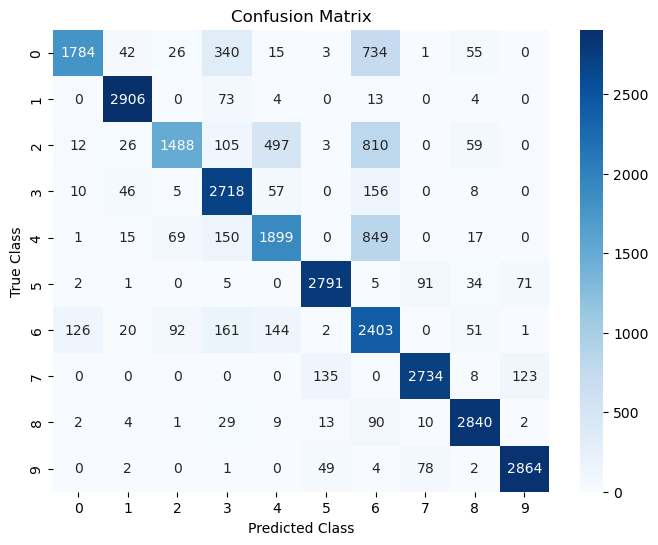

In [18]:
evaluate_model(y_train_onehot.idxmax(axis=1), predictions)

In [20]:
test_data = pd.read_csv('classification_test .csv')
test_df = test_data.to_numpy()

In [21]:
x_test = test_df[:, 1:]  

# Predict on test data
predictions = predict_multiclass(x_test, W, b)
print(f"Largest Prediction index for each row: {predictions}")

Largest Prediction index for each row: [6 1 2 ... 8 6 1]
